SETUP ENV

In [16]:
# Environment
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

API INFO

In [17]:
# API key
api_key = '0HGOXU7CQ5P97A05'
base_url = 'https://www.alphavantage.co/query?'

REQUEST API

In [18]:
# API request URLS
url_xlk = (f"{base_url}function=TIME_SERIES_DAILY&symbol=XLK&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")
url_xlv = (f"{base_url}function=TIME_SERIES_DAILY&symbol=XLV&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")
url_xle = (f"{base_url}function=TIME_SERIES_DAILY&symbol=XLE&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")
url_xlf = (f"{base_url}function=TIME_SERIES_DAILY&symbol=XLF&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")

FETCH DATA & CREATE CSV'S

In [19]:
# Function to fetch and save data
def save_data(url, symbol):
    response = requests.get(url)
    
    # Save the CSV content to a file
    with open(f'{symbol}_data.csv', 'wb') as file:
        file.write(response.content)
    
    # Load the data into a DataFrame
    data = pd.read_csv(f'{symbol}_data.csv')
    
    # Convert 'timestamp' to datetime format
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    
    # Filter the data for the date range 2017 to end of 2023
    filtered_data = data[(data['timestamp'] >= '2017-01-01') & (data['timestamp'] <= '2023-12-31')]
    
    # Save the filtered data to a new CSV file
    filtered_data.to_csv(f'{symbol}_data_2017_2023.csv', index=False)
    
    print(f'{symbol} data saved to CSV: {symbol}_data_2017_2023.csv')

# Fetch and save data for each sector
save_data(url_xlk, 'XLK')
save_data(url_xlv, 'XLV')
save_data(url_xle, 'XLE')
save_data(url_xlf, 'XLF')

XLK data saved to CSV: XLK_data_2017_2023.csv
XLV data saved to CSV: XLV_data_2017_2023.csv
XLE data saved to CSV: XLE_data_2017_2023.csv
XLF data saved to CSV: XLF_data_2017_2023.csv


FIND MONTHY AVERAGES

In [20]:
# Monthly averages and save to CSV
def calculate_monthly_averages(symbol):
    # Load data from the previously saved CSV file
    data = pd.read_csv(f'{symbol}_data_2017_2023.csv')
    
    # Convert 'timestamp' to datetime
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    
    # Set 'timestamp' as the index
    data.set_index('timestamp', inplace=True)
    
    # Resample the data by month and calculate the mean for the 'close' column
    monthly_avg = data['close'].resample('ME').mean()
    
    # New CSV file
    monthly_avg.to_csv(f'{symbol}_monthly_avg.csv', header=['Monthly Average'])

CREATE LINE CHART

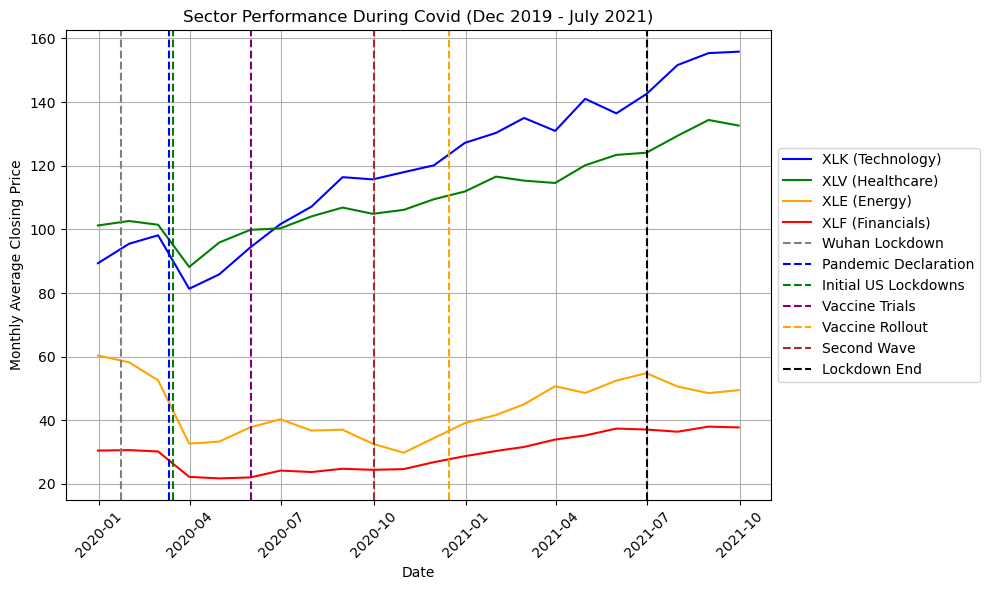

In [21]:
# Load the data
xlk_data = pd.read_csv('XLK_data.csv')
xlv_data = pd.read_csv('XLV_data.csv')
xle_data = pd.read_csv('XLE_data.csv')
xlf_data = pd.read_csv('XLF_data.csv')

# Ensure 'timestamp' is a datetime object for all data
xlk_data['timestamp'] = pd.to_datetime(xlk_data['timestamp'])
xlv_data['timestamp'] = pd.to_datetime(xlv_data['timestamp'])
xle_data['timestamp'] = pd.to_datetime(xle_data['timestamp'])
xlf_data['timestamp'] = pd.to_datetime(xlf_data['timestamp'])

# Resample the data by month to calculate monthly averages
xlk_monthly_avg = xlk_data.resample('ME', on='timestamp').mean()
xlv_monthly_avg = xlv_data.resample('ME', on='timestamp').mean()
xle_monthly_avg = xle_data.resample('ME', on='timestamp').mean()
xlf_monthly_avg = xlf_data.resample('ME', on='timestamp').mean()

# Filter data
start_date = pd.to_datetime('2019-12-01')
end_date = pd.to_datetime('2021-10-01')

xlk_filtered = xlk_monthly_avg[(xlk_monthly_avg.index >= start_date) & (xlk_monthly_avg.index <= end_date)]
xlv_filtered = xlv_monthly_avg[(xlv_monthly_avg.index >= start_date) & (xlv_monthly_avg.index <= end_date)]
xle_filtered = xle_monthly_avg[(xle_monthly_avg.index >= start_date) & (xle_monthly_avg.index <= end_date)]
xlf_filtered = xlf_monthly_avg[(xlf_monthly_avg.index >= start_date) & (xlf_monthly_avg.index <= end_date)]

# Plot the closing price for each sector within the filtered timeframe
plt.figure(figsize=(10, 6))

plt.plot(xlk_filtered.index, xlk_filtered['close'], label='XLK (Technology)', color='blue')
plt.plot(xlv_filtered.index, xlv_filtered['close'], label='XLV (Healthcare)', color='green')
plt.plot(xle_filtered.index, xle_filtered['close'], label='XLE (Energy)', color='orange')
plt.plot(xlf_filtered.index, xlf_filtered['close'], label='XLF (Financials)', color='red')

# Add annotations for key events
# 1) Wuhan Lockdown (January 23, 2020)
plt.axvline(x=pd.to_datetime('2020-01-23'), color='gray', linestyle='--', label='Wuhan Lockdown')
plt.text(pd.to_datetime('2020-01-23'), max(xlk_filtered['close']), '', color='gray')

# 2) COVID-19 Pandemic Declaration (March 11, 2020)
plt.axvline(x=pd.to_datetime('2020-03-11'), color='blue', linestyle='--', label='Pandemic Declaration')
plt.text(pd.to_datetime('2020-03-11'), max(xlk_filtered['close']) * 0.9, '', color='blue')

# 3) Initial US Lockdowns (March 15, 2020)
plt.axvline(x=pd.to_datetime('2020-03-15'), color='green', linestyle='--', label='Initial US Lockdowns')
plt.text(pd.to_datetime('2020-03-15'), max(xlk_filtered['close']) * 0.85, '', color='green')

# 4) Vaccine Trials and Announcements (June 2020)
plt.axvline(x=pd.to_datetime('2020-06-01'), color='purple', linestyle='--', label='Vaccine Trials')
plt.text(pd.to_datetime('2020-06-01'), max(xlk_filtered['close']) * 0.8, '', color='purple')

# 5) Vaccine Rollout (Dec 15, 2020)
plt.axvline(x=pd.to_datetime('2020-12-15'), color='orange', linestyle='--', label='Vaccine Rollout')
plt.text(pd.to_datetime('2020-12-15'), max(xlk_filtered['close']) * 0.75, '', color='orange')

# 6) Second COVID-19 Wave (Oct-Nov 2020)
plt.axvline(x=pd.to_datetime('2020-10-01'), color='brown', linestyle='--', label='Second Wave')
plt.text(pd.to_datetime('2020-10-01'), max(xlk_filtered['close']) * 0.7, '', color='brown')

# 7) Covid lockdown end (July 1, 2021)
plt.axvline(x=pd.to_datetime('2021-07-01'), color='black', linestyle='--', label='Lockdown End')
plt.text(pd.to_datetime('2021-07-01'), max(xlk_filtered['close']) * 0.65, '', color='black')

# Move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Customize the plot
plt.title('Sector Performance During Covid (Dec 2019 - July 2021)')
plt.xlabel('Date')
plt.ylabel('Monthly Average Closing Price')
plt.xticks(rotation=45)
plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout()

# Display the plot
plt.show()



RETURNS

In [22]:
# Calculate daily returns for each sector
xlk_data['returns'] = xlk_data['close'].pct_change()
xlv_data['returns'] = xlv_data['close'].pct_change()
xle_data['returns'] = xle_data['close'].pct_change()
xlf_data['returns'] = xlf_data['close'].pct_change()

def add_returns_column(symbol):
    try:
        # Load data from the previously saved CSV file
        data = pd.read_csv(f'{symbol}_data_2017_2023.csv')
        
        # Convert 'timestamp' to datetime
        data['timestamp'] = pd.to_datetime(data['timestamp'])
        
        # Calculate daily returns
        data['returns'] = data['close'].pct_change()
        
        # Save the updated data back to the CSV file
        data.to_csv(f'{symbol}_data_2017_2023.csv', index=False)
        
        print(f"Returns column added successfully to {symbol}_data_2017_2023.csv.")
    
    except FileNotFoundError:
        print(f"Error: {symbol}_data_2017_2023.csv not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Add returns column for each sector
add_returns_column('XLK')
add_returns_column('XLV')
add_returns_column('XLE')
add_returns_column('XLF')


Returns column added successfully to XLK_data_2017_2023.csv.
Returns column added successfully to XLV_data_2017_2023.csv.
Returns column added successfully to XLE_data_2017_2023.csv.
Returns column added successfully to XLF_data_2017_2023.csv.


T-TEST (STUDY WINDOW 60 DAYS)

In [23]:
# List of sectors and data
sectors = {
    'Technology (XLK)': xlk_data,
    'Healthcare (XLV)': xlv_data,
    'Energy (XLE)': xle_data,
    'Financials (XLF)': xlf_data
}

# List of events
events = {
    'Wuhan Lockdown': '2020-01-23',
    'Pandemic Declaration': '2020-03-11',
    'Initial US Lockdowns': '2020-03-15',
    'Vaccine Trials': '2020-06-01',
    'Second Wave': '2020-10-01',
    'Vaccine Rollout': '2020-12-15',
    'Lockdown End': '2021-07-01'
}

# Get pre-event and post-event returns with equal lengths
def event_window_equal_length(data, event_date, pre_days=60, post_days=60):
    event_date = pd.to_datetime(event_date)
    
    # Get pre-event and post-event returns
    pre_event = data[(data['timestamp'] < event_date) & (data['timestamp'] >= event_date - pd.Timedelta(days=pre_days))]['returns']
    post_event = data[(data['timestamp'] > event_date) & (data['timestamp'] <= event_date + pd.Timedelta(days=post_days))]['returns']
    
    # Trim the array to match the length of the smaller one
    min_length = min(len(pre_event), len(post_event))
    pre_event = pre_event.iloc[-min_length:]
    post_event = post_event.iloc[:min_length] 
    
    return pre_event, post_event

# Initialize a list
results = []

# Loop through each sector and each event
for sector_name, sector_data in sectors.items():
    for event_name, event_date in events.items():
        
        # Get pre-event and post-event returns for the current event
        pre_event_returns, post_event_returns = event_window_equal_length(sector_data, event_date)
        
        # Perform the paired t-test
        t_stat, p_value = stats.ttest_rel(pre_event_returns, post_event_returns)
        
        # Determine if the result is significant
        significant = "Yes" if p_value < 0.05 else "No"
        
        # Append the results to the list
        results.append({
            "Event": event_name,
            "Sector": sector_name,
            "T-Statistic": round(t_stat, 3),
            "P-Value": round(p_value, 3),
            "Significant (P < 0.05)": significant
        })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv('T_Test_Results.csv', index=False)

# Display the DataFrame
results_df


,Event,Sector,T-Statistic,P-Value,Significant (P < 0.05)
0,Wuhan Lockdown,Technology (XLK),-1.237,0.224,No
1,Pandemic Declaration,Technology (XLK),0.755,0.455,No
2,Initial US Lockdowns,Technology (XLK),1.495,0.143,No
3,Vaccine Trials,Technology (XLK),-0.561,0.578,No
4,Second Wave,Technology (XLK),0.313,0.756,No
5,Vaccine Rollout,Technology (XLK),0.432,0.668,No
6,Lockdown End,Technology (XLK),0.015,0.988,No
7,Wuhan Lockdown,Healthcare (XLV),-1.306,0.200,No
8,Pandemic Declaration,Healthcare (XLV),0.810,0.423,No
9,Initial US Lockdowns,Healthcare (XLV),1.652,0.106,No


ADDITIONAL VISUALIZATION(S)

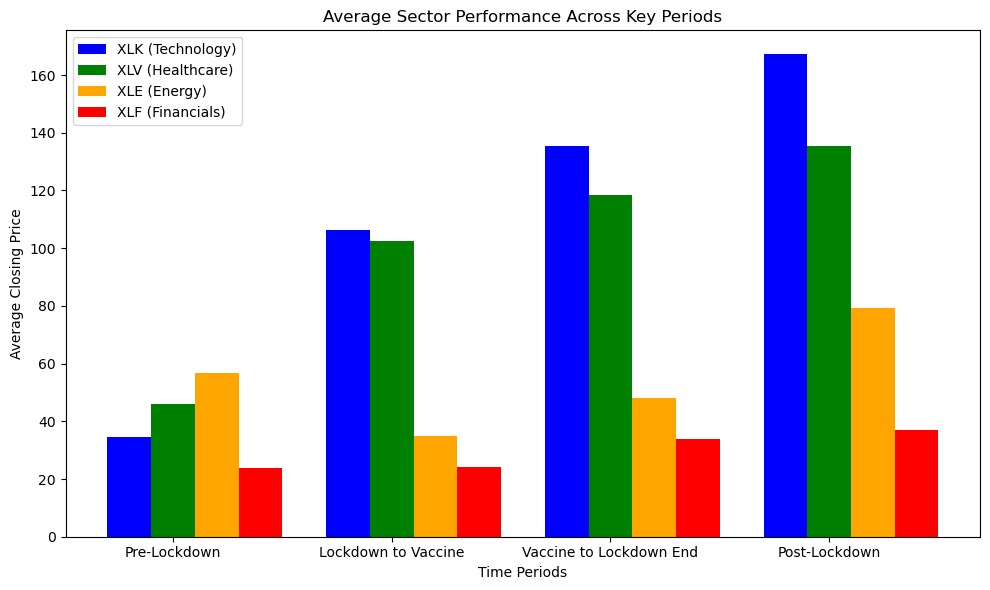

In [24]:
# Define the date ranges
pre_lockdown = (xlk_data['timestamp'] < '2020-03-15')
lockdown_to_vaccine = (xlk_data['timestamp'] >= '2020-03-15') & (xlk_data['timestamp'] < '2020-12-15')
vaccine_to_lockdown_end = (xlk_data['timestamp'] >= '2020-12-15') & (xlk_data['timestamp'] < '2021-07-01')
post_lockdown = (xlk_data['timestamp'] >= '2021-07-01')

# Function to calculate average closing prices for different time periods
def calculate_averages(data):
    return [
        data[pre_lockdown]['close'].mean(),
        data[lockdown_to_vaccine]['close'].mean(),
        data[vaccine_to_lockdown_end]['close'].mean(),
        data[post_lockdown]['close'].mean()
    ]

# Calculate averages for each sector
xlk_avg = calculate_averages(xlk_data)
xlv_avg = calculate_averages(xlv_data)
xle_avg = calculate_averages(xle_data)
xlf_avg = calculate_averages(xlf_data)

# Labels and bar width
labels = ['Pre-Lockdown', 'Lockdown to Vaccine', 'Vaccine to Lockdown End', 'Post-Lockdown']
bar_width = 0.2
index = range(len(labels))

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))

# Plot each sector's bars side by side
plt.bar([i - bar_width for i in index], xlk_avg, bar_width, label='XLK (Technology)', color='blue')
plt.bar(index, xlv_avg, bar_width, label='XLV (Healthcare)', color='green')
plt.bar([i + bar_width for i in index], xle_avg, bar_width, label='XLE (Energy)', color='orange')
plt.bar([i + 2 * bar_width for i in index], xlf_avg, bar_width, label='XLF (Financials)', color='red')

# Customize the plot
plt.xlabel('Time Periods')
plt.ylabel('Average Closing Price')
plt.title('Average Sector Performance Across Key Periods')
plt.xticks(index, labels)
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()


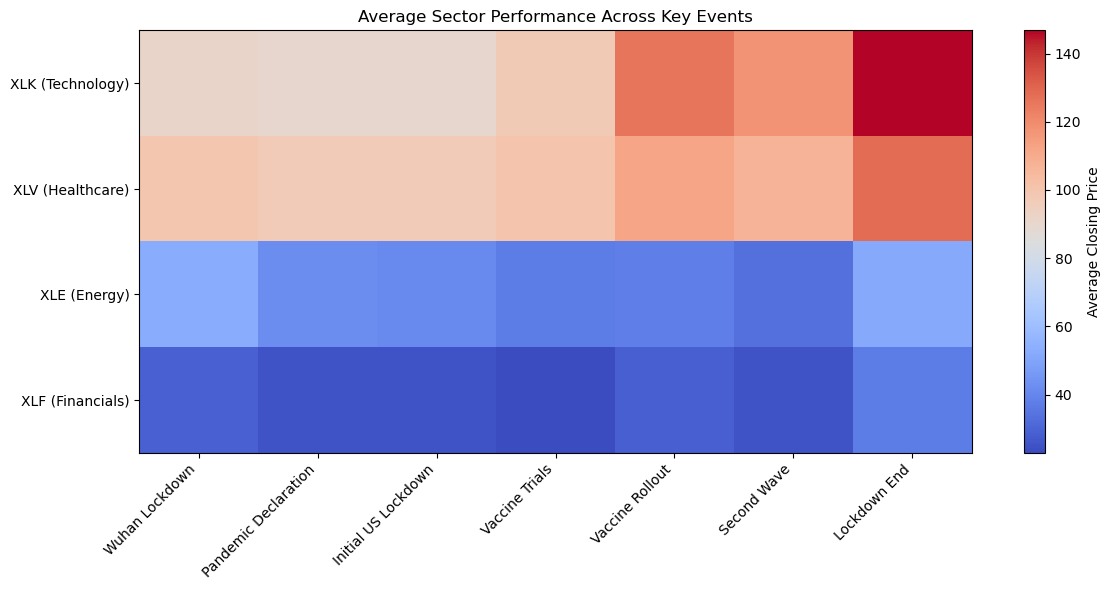

In [25]:
# Define the date ranges based on the 60-day window around events
wuhan_lockdown = (xlk_data['timestamp'] >= '2019-11-23') & (xlk_data['timestamp'] <= '2020-03-23')
pandemic_declaration = (xlk_data['timestamp'] >= '2020-01-11') & (xlk_data['timestamp'] <= '2020-05-11')
initial_lockdown = (xlk_data['timestamp'] >= '2020-01-15') & (xlk_data['timestamp'] <= '2020-05-15')
vaccine_trials = (xlk_data['timestamp'] >= '2020-04-01') & (xlk_data['timestamp'] <= '2020-08-01')
vaccine_rollout = (xlk_data['timestamp'] >= '2020-10-15') & (xlk_data['timestamp'] <= '2021-02-15')
second_wave = (xlk_data['timestamp'] >= '2020-08-01') & (xlk_data['timestamp'] <= '2020-12-01')
lockdown_end = (xlk_data['timestamp'] >= '2021-05-01') & (xlk_data['timestamp'] <= '2021-09-01')

# Calculate average closing prices for different time periods
def averages(data):
    return [
        data[wuhan_lockdown]['close'].mean(),
        data[pandemic_declaration]['close'].mean(),
        data[initial_lockdown]['close'].mean(),
        data[vaccine_trials]['close'].mean(),
        data[vaccine_rollout]['close'].mean(),
        data[second_wave]['close'].mean(),
        data[lockdown_end]['close'].mean()
    ]

# Calculate averages for each sector
xlk_avg = averages(xlk_data)
xlv_avg = averages(xlv_data)
xle_avg = averages(xle_data)
xlf_avg = averages(xlf_data)

# Create a matrix for the heatmap data
heatmap_data = np.array([xlk_avg, xlv_avg, xle_avg, xlf_avg])

# Create the heatmap
plt.figure(figsize=(12, 6))  # Increase figure size to give more space
plt.imshow(heatmap_data, cmap='coolwarm', aspect='auto')

# Add color bar to indicate scale
plt.colorbar(label='Average Closing Price')

# Define the x-axis and y-axis labels
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Wuhan Lockdown', 'Pandemic Declaration', 'Initial US Lockdown', 'Vaccine Trials', 'Vaccine Rollout', 'Second Wave', 'Lockdown End'], rotation=45, ha='right')
plt.yticks(ticks=[0, 1, 2, 3], labels=['XLK (Technology)', 'XLV (Healthcare)', 'XLE (Energy)', 'XLF (Financials)'])

# Title
plt.title('Average Sector Performance Across Key Events')

# Display the plot
plt.tight_layout()
plt.show()
